KNN

In [2]:
"""pip install --upgrade pandas"""


'pip install --upgrade pandas'

/var/folders/kw/2mf6m7dx0pn9xqtnjjs396700000gn/T/ipykernel_35015/2158784932.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


importing Jupyter notebook from preprocess.ipynb
Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      2001
Hovedområde start             4124
Lokasjon start (kode)         2001
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1962
Hovedområde stopp             4124
Lokasjon stopp (kode)         1962
Havdybde stopp                   0
Trekkavstand                    24
Redskap FAO (kode)               0
Redskap FAO                    188
Redska

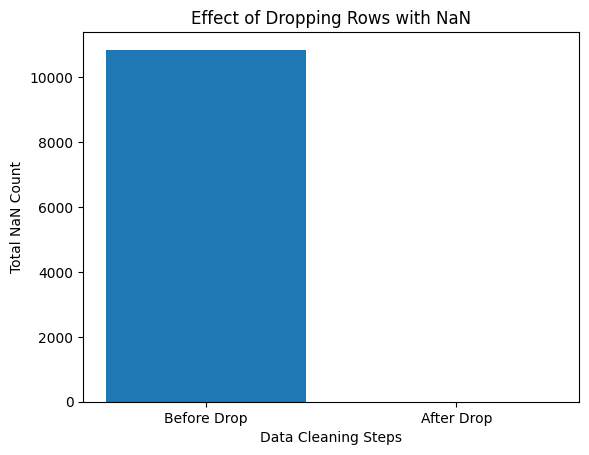

Art - FDIR
Torsk                  56507
Sei                    42495
Hyse                   39080
Lange                  17328
Uer (vanlig)           14151
                       ...  
Sagtang                    1
Annen makrell              1
Blåhval                    1
Annen laksefisk            1
Bukstripet pelamide        1
Name: count, Length: 121, dtype: int64


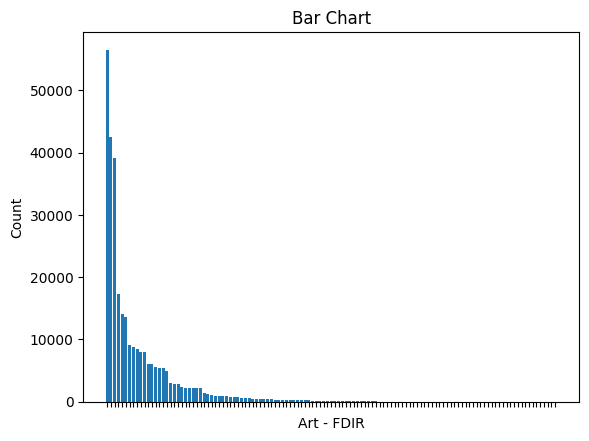

,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month
2,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,0,8510.0,12.6,56.8,12
4,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,1,134.0,12.6,56.8,12
6,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,0,6651.0,12.6,56.8,12
9,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,1,67.0,12.6,56.8,12
12,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,0,5097.0,12.6,56.8,12


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


"""#execute the entire 'preprosses' notebook in your current notebook
%run preprosses.ipynb"""
import import_ipynb
from preprocess import df
df.head()

A barchart of all fish to visualize 

Splitting dataset
Vi are divinfing datset into features. We also have to split these into both test and trainingset. So after that we can see if the ML is doing good or not. 

In [4]:
# Assuming your target variable is 'Art - FDIR' 
features = ['Startposisjon bredde', 'Startposisjon lengde','Redskap FDIR (kode)', 'Rundvekt']#Why it get better score with only 4 features
X = df[features]
y = df['Art - FDIR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standarisation and scaing 


Can be smart to normalize the featurtes because then no feature is very different from one another 
We are leverling out the feild for all features so the KNN works better and make even more accurate predictions  

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply the scaling transformation to the training data (X_train)
# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling transformation to the test data (X_test)
# Transform the test data using the parameters learned from the training data
X_test_scaled = scaler.transform(X_test)


# Make a KNN classefier with the k as 3 

In [6]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier with  3 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = knn_classifier.predict(X_test_scaled)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7470834806322914


# Computing a confuion matrix and visulazing it

Here it is showing a summary of preformance of the classifications models
You can also see that there is a bigger amout of Torsk compared to Sei. Therefore, the accuracy here is greater than for Sei. Also a reason we decided to focus on the fish with the most values. COnsidering we have more data on the Torsk the accuracy will become more accurate because it has more data to use. 

We decided to have less features and therefore there will be less varians. Considering this the accuracy score became better because of less varians. 
With less varians the eucledean distance will become shorter and therefore the accuracy will become better. 
If you look at these scores and the others. Here we had more features and on the one below we had less features. 


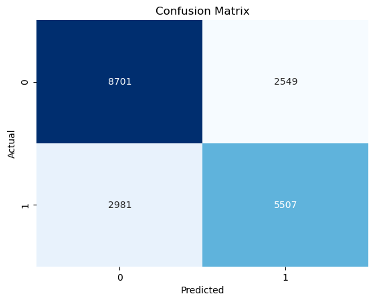

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78     11337
           1       0.71      0.69      0.70      8464

    accuracy                           0.75     19801
   macro avg       0.74      0.74      0.74     19801
weighted avg       0.75      0.75      0.75     19801



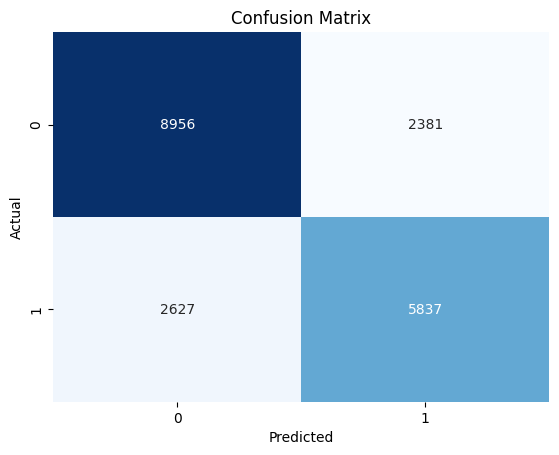

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the classification report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)
cm = confusion_matrix(y_test, predictions)
# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Looking at over and underfitting 

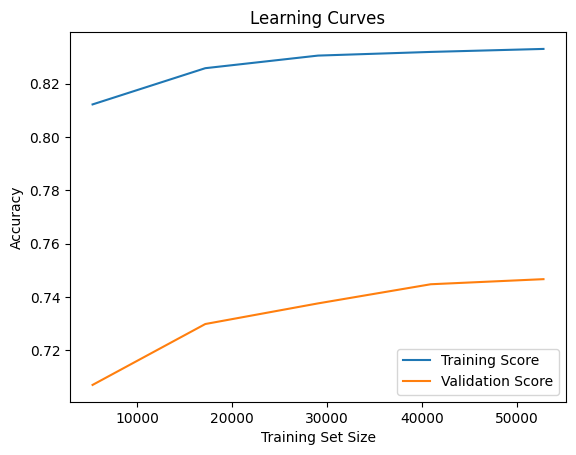

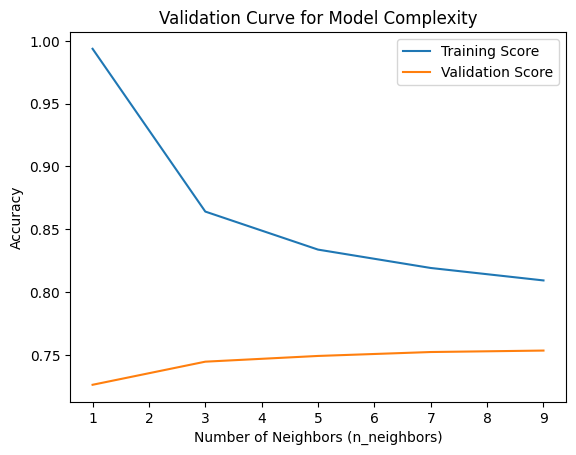

In [8]:
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Define the KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Adjusted learning_curve parameters
train_sizes, train_scores, test_scores = learning_curve(
    knn_classifier, X_train_scaled, y_train, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1,  1.0,  5)
)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()


param_range = [1, 3, 5, 7, 9]  # Example values for n_neighbors
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train_scaled, y_train, param_name='n_neighbors',
    param_range=param_range, cv=5, scoring='accuracy'
)

plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Curve for Model Complexity')
plt.show()

### Comparing the data 
You can take a look and the data above and the data below. Because we had less features in the code we used to visualize the graps above you can see that the scores improved and therefore we decided to stick with this. 

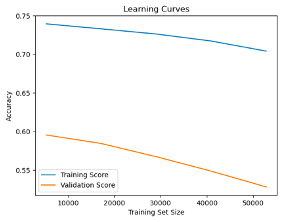
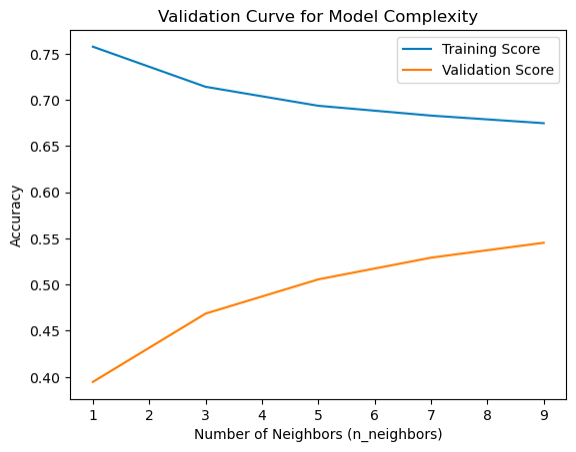

## What does the data tell us 
The training score is much higher then validation, wich indicates overfitting.